In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
train_images = train_images/255.0
test_images = test_images/255.0

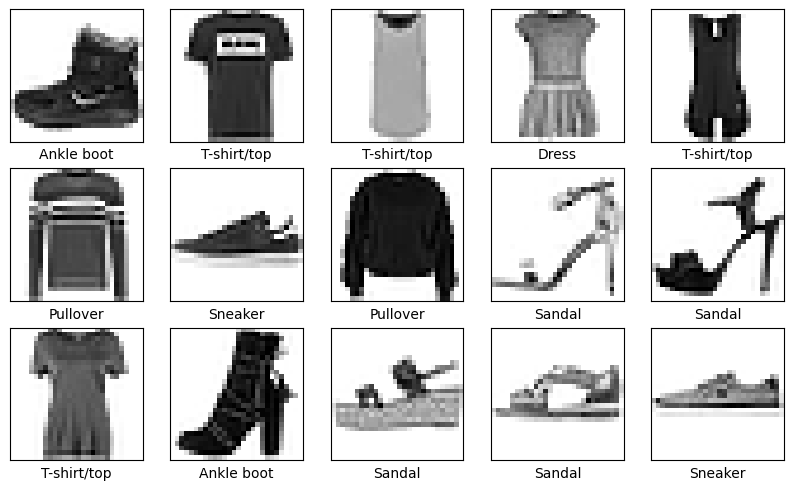

In [7]:
plt.figure(figsize =(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5008 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3708 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3340 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3106 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2932 - accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2784 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2645 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2566 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2454 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.23

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3357 - accuracy: 0.8846 - 755ms/epoch - 2ms/step

Test accuracy: 0.8845999836921692


In [14]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [15]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [16]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]
        ),
    color=color
    )

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

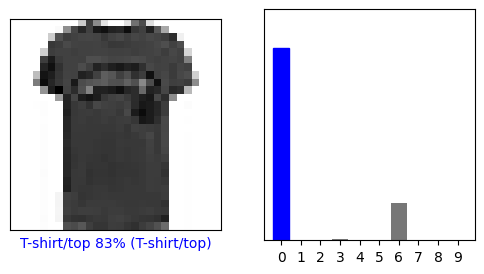

In [21]:
i = 19
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

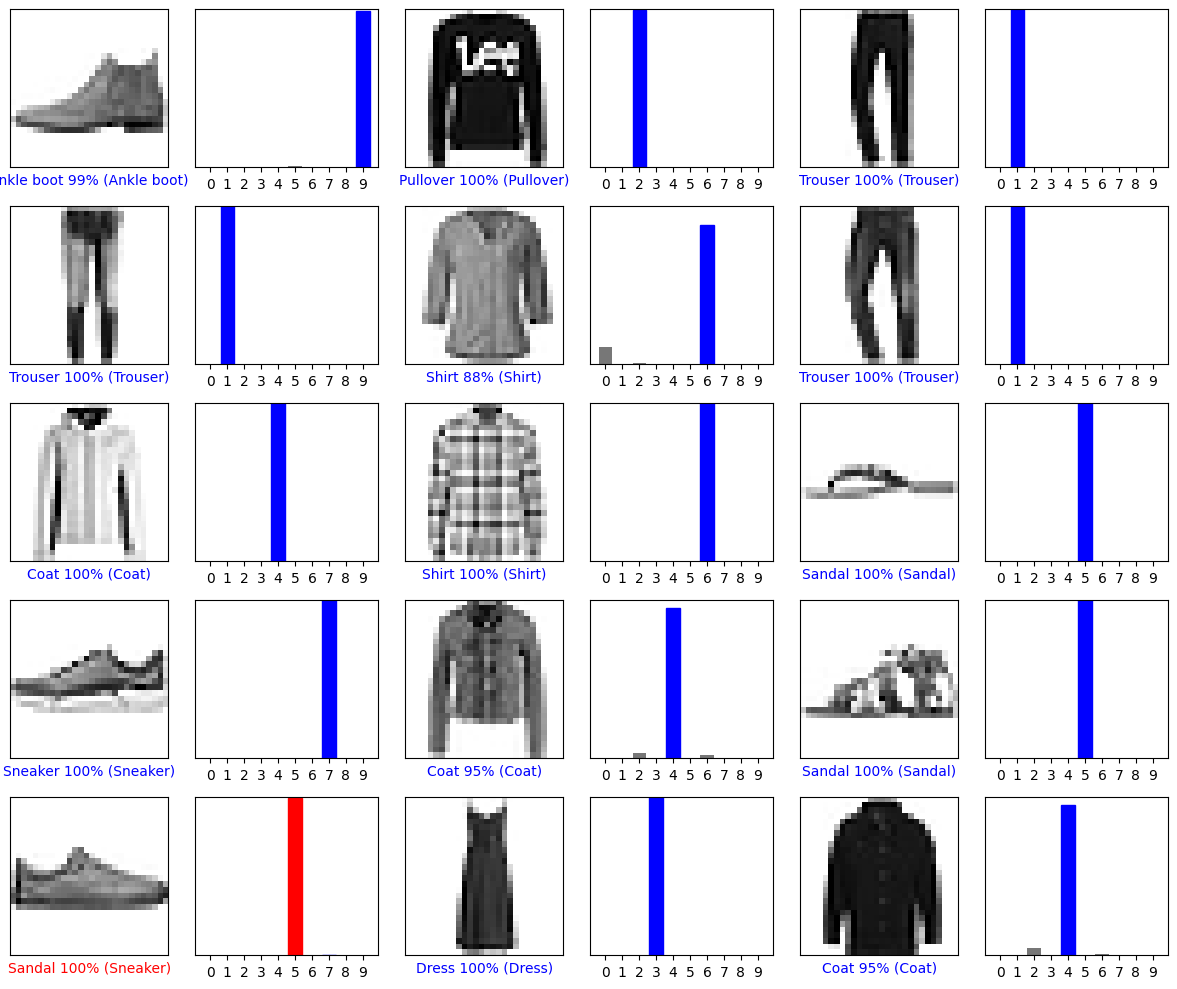

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
img = test_images[1]
print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 46ms/step
[[1.20231183e-04 1.44898038e-10 9.95267928e-01 3.93910895e-08
  4.33238642e-03 3.18855053e-09 2.79390486e-04 2.20893573e-12
  4.09664608e-10 1.33190976e-11]]


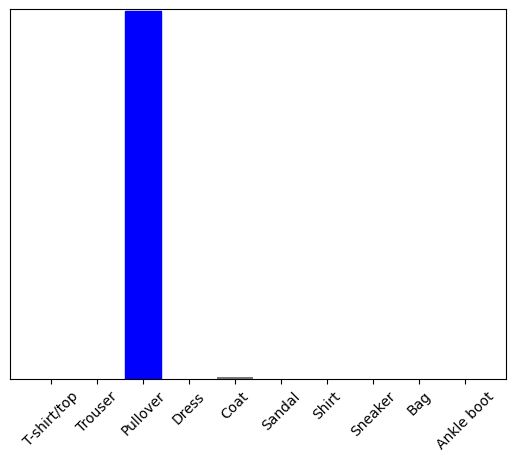

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [30]:
np.argmax(predictions_single[0])

2